In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pydataset import data
import statistics

## Hypothesis Testing Exercises (May 7th)

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

#### #1. Has the network latency gone up since we switched internet service providers?
- $H_{0}$: there is no change to network latency since switching providers
- $H_{a}$: there is a change in network latency since switching providers
- True Positive: I reject the $H_{0}$, and the network latency has chanced since switching providers
- True Negative: I fail to reject the $H_{0}$, and the network latency has not chanced since switching providers
- Type I error: I reject the $H_{0}$, but switching provides does not change network latency
- Type II error: I fail to reject the $H_{0}$, but switching provides does change network latency

#### #2. Is the website redesign any good?
- $H_{0}$: the website redesign has caused no change in revenue
- $H_{a}$: the website redesign has caused revenue to increase significantly
- True Positive: I reject the $H_{0}$, and the web redesign does change revenue
- True Negative: I fail to reject the $H_{0}$, and web redesign do not change revenue
- Type I error: I reject the $H_{0}$,but web redesign do not change revenue
- Type II error: I fail to reject the $H_{0}$, but web redesign do change revenue

#### #3. Is our television ad driving more sales?
- $H_{0}$: the television ad is not driving more sales 
- $H_{a}$: the television ad does drive more sales
- True Positive: I reject the $H_{0}$, and the television ads do drive sales
- True Negative: I fail to reject the $H_{0}$, and television ads do not drive more sales
- Type I error: I reject the $H_{0}$,but television ads do not drive sales
- Type II error: I fail to reject the $H_{0}$, but television ads do drive sales

_____

# EXERCISES: T-TEST (May 10)

1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

2) Load the mpg dataset and use it to answer the following questions:

    a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    b. Are compact cars more fuel-efficient than the average car?
    c. Do manual cars get better gas mileage than automatic cars?

#### #1 Ace Realty

- compare average time selling homes is different at 2 offices
- office 1: sample size = 40, mean= 90, stddev = 15
- office 2: sample size= 50, mean= 100, stddev = 20
- alpha = .05

##### first, see what kinds of data you're comparing. 
- average time (numeric/continious) vs two offices (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [2]:
# this will be:
# a 2 sample t-test- comparing two offices
# a 2 tailed- want to know if the average is larger OR smaller in either office

#### Step 1: plot distribution

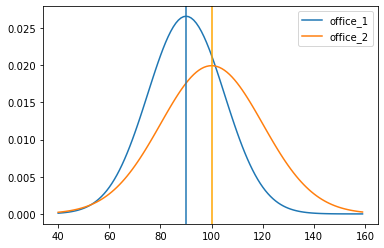

In [3]:
x= np.arange(40,160)

#y=stats.norm(mean, stddev).pdf(x)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90)
plt.axvline(100, color='orange')

plt.legend()

In [4]:
avg_y1 = np.mean(y1)
avg_y1

0.008330155453183524

In [5]:
avg_y2= np.mean(y2)
avg_y2

0.008310788879259125

#### Step 2: Set Hypothesis

- $H_0$: There is no diffence in mean selling time between the two offices
- $H_a$: There is a diffence in mean selling time between the two offices   

#### Step 3: Set Alpha

In [6]:
alpha = .05

#### Step 4: Verify Assumption
- samples are independent = YES, two seperate data sets
- normal distribution = YES, sample sizes are 50 and 40
- equal variance = False

In [7]:
y1.var(), y2.var()
#this shows the variance is not the same. must set variance to false

(8.732768938580959e-05, 4.846766783681116e-05)

#### Step 5: Compute Test Statistics

In [8]:
# 2 sample. 2 tailed

In [9]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100,20, 50, equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [10]:
p < alpha

True

#### Step 6: Decide

In [11]:
print('''
because the p-value is less than alpha value, we reject null hypthosis''')


because the p-value is less than alpha value, we reject null hypthosis


we reject our $H_0$, there is a difference in average selling time between the two offices.

______________________________________________________

#### 2) Load the mpg dataset 

In [12]:
mpg = data('mpg')

In [13]:
mpg.head()
#get a sneakpeek

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

##### first, see what kinds of data you're comparing. 
- average mileage (numeric/continious) vs two years (distinct/categorical)


In [15]:
# find average between city and hwy mileage for each year

### harmonic mean:
    - fe_hm= 2/(1/cty +1/hwy)
    - use for mpg, mph in two values
### arithmetic mean: 
    - fe_am = (cty +hwy)/2

In [16]:
mpg['average_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()
#use this code to find the mean of cty and hwy combined and create a 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [17]:
# this will be:
# a 2 sample t-test- comparing two years
# a 2 tailed- wants the difference, not if one is less or more

In [18]:
#create new panda series
ninenine_fuel = mpg[mpg.year == 1999].average_mpg
oeight_fuel = mpg[mpg.year == 2008].average_mpg

#### Step 1: plot distribution

<AxesSubplot:>

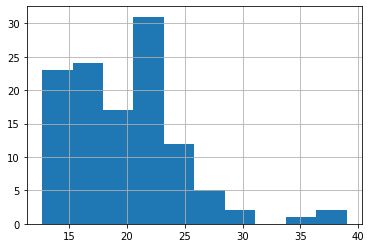

In [19]:
ninenine_fuel.hist()

<AxesSubplot:>

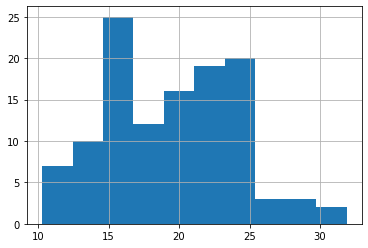

In [20]:
oeight_fuel.hist()

#### Step 2: Set Hypothesis

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

#### Step 3: Set Alpha

In [21]:
alpha = .05

#### Step 4: Verify Assumption

- samples are independent = YES, two seperate data sets
- normal distribution = Not normal BUT there are more than 30 sample size
- equal variance = False

In [22]:
# to find sample size- must more than 30 to meet assumption
ninenine_fuel.count(), oeight_fuel.count()

(117, 117)

In [23]:
#to find variance
ninenine_fuel.var(), oeight_fuel.var()

(25.850396545865912, 22.550836772260343)

#### Step 5: Compute Test Statistics

In [24]:
t, p = stats.ttest_ind(oeight_fuel, ninenine_fuel, equal_var=False)

In [25]:
t,p,alpha

(-0.3011962975077886, 0.7635358418225436, 0.05)

In [26]:
p < alpha

False

#### Step 6: Decide

- Because p > α, we fail to reject our $H_0$. There is no difference in fuel-economy between 1999 and 2008 vehicles

In [27]:
## just look at the means to visually confirm your decision
ninenine_fuel.mean(), oeight_fuel.mean()

(19.68238764869729, 19.488662986569054)

___________________________________________________________

### b. Are compact cars more fuel-efficient than the average car?

##### first, see what kinds of data you're comparing. 
- average mileage (numeric/continious) vs two car types (distinct/categorical)

In [28]:
fuel_compact = mpg[mpg['class'] == 'compact'].average_mpg
μ = mpg.average_mpg.mean()
#create new panda series with column of compact car average mpg

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- one tailed or 2 tailed?

In [29]:
#this is:
# one sample- only looking at compact cars average
# one tailed- MORE fuel efficient, not is there a difference in fuel

#### Step 1: plot distribution

<AxesSubplot:>

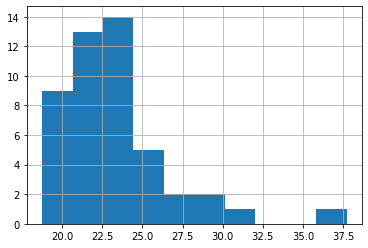

In [30]:
fuel_compact.hist()

In [31]:
t, p = stats.ttest_1samp(fuel_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

#### Step 2: Set Hypothesis
- $H_0$: there is no between compact car fuel-efficiency and the average fuel efficiency
- $H_a$: there is a between compact car fuel-efficiency and the average fuel efficiency

#### Step 3: Set alpha

In [32]:
alpha = .05

#### Step 4: Verify Assumptions
- normal distribution = YES


In [33]:
fuel_compact.count()
#must be more than 30

47

#### Step 5: Compute Test Statistics

In [34]:
t, p = stats.ttest_1samp(fuel_compact, μ)
t,p

(7.512360093161354, 1.5617666348807727e-09)

#### Step 6: Decide

In [35]:
p/2 < alpha

True

Because p/2 < α, we accept our $H_0$. Compact cars are more fuel efficient

________________________________________________________

### c. Do manual cars get better gas mileage than automatic cars?

##### first, see what kinds of data you're comparing. 
- fuel economy (numeric/continious) vs car type (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [36]:
# this will be:
#     1 tail- wants to know if gas mileage is better
#     2 sample t-test

In [37]:
#create two new datasets 
fuel_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
fuel_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

#### Step 1: plot distribution

<AxesSubplot:>

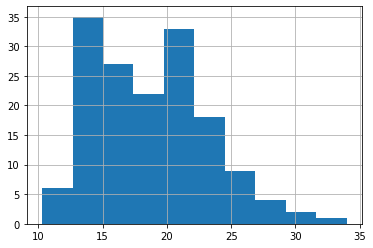

In [38]:
fuel_auto.hist()

<AxesSubplot:>

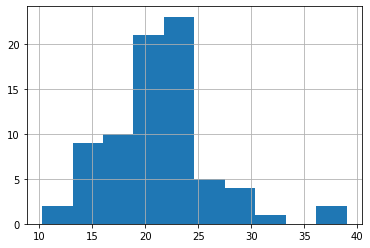

In [39]:
fuel_manual.hist()

#### Step 2: Set Hypothesis

- $H_0$: there is no between automatic and manual fuel efficiency
- $H_a$: there is a between automatic and manual fuel efficiency

#### Step 3: Set alpha

In [40]:
alpha = .05

#### Step 4: Verify Assumptions

- samples are independent = YES, two seperate data sets
- normal distribution = Yes and sample size greater than 30
- equal variance = False

In [41]:
fuel_auto.count(), fuel_manual.count()
#check sample size, must be more than 30

(157, 77)

In [42]:
fuel_auto.var(), fuel_manual.var()
#check variance

(20.428279095002054, 25.665633639828275)

#### Step 5: Compute Statistical Test

In [43]:
t, p = stats.ttest_ind(fuel_manual, fuel_auto, equal_var = False)
#because it is a 2 sample test, must use ttest_ind
t,p, alpha

(4.47444321386703, 1.598070270207952e-05, 0.05)

#### Step 6: Decide

In [44]:
p/2 < alpha
#because it is a one-tailed test, must divide p by 2

True

Because p/2 < alpha, we reject the null hypthosis that there is no difference in gas milage between manual and auto cars

In [45]:
## just look at the means to visually confirm your decision
fuel_manual.mean(), fuel_auto.mean()

(21.629228592155194, 18.583199507835747)

#### ^-- 21.69 is not the same as 18.58 SO... the null that there is NO difference in fuel economy is rejected

________

# EXERCISES: Correlation Tests (May 11)

1. Use the telco_churn data. 
- a. Does tenure correlate with monthly charges? 
- b. Total charges? 
- c. What happens if you control for phone and internet service?

2. Use the employees database.
- a. Is there a relationship between how long an employee has been with the company and their salary?
- b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3. Use the sleepstudy data. 
- a. Is there a relationship between days and reaction time?

#### #1 Use the telco_churn data.

In [46]:
df = pd.read_csv('Cust_Churn_Telco.csv')

In [47]:
# Clean the data
df.TotalCharges.replace(" ", np.nan, inplace = True)
df.dropna(inplace = True)
df.sort_values("TotalCharges")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
6489,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
1151,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
4939,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
583,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1a. Does tenure correlate with monthly charges?

In [49]:
x = df.tenure
y= df.MonthlyCharges

#number of rows
n = df.shape[0] 

#degrees of freedom- how much the data can vary
deg_f = n-2 

#confidence interval (!)
conf_in = 0.95

alpha = 1- conf_in

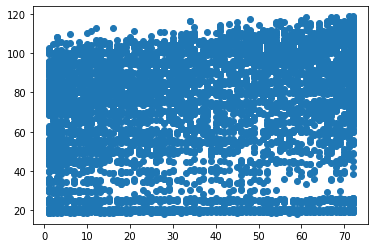

In [50]:
plt.scatter(x,y)

In [51]:
r, p = stats.pearsonr(x,y)
r, p

(0.2468617666408957, 3.9898213232510553e-98)

In [52]:
print(f'We calcaulate a pearson r of {r:3f} and a statistical certainty p of {p:4f}')

We calcaulate a pearson r of 0.246862 and a statistical certainty p of 0.000000


In [53]:
p<alpha

True

$H_0$: There is no linear correlation between the Monthly charges and tenure

##### Conclusion: there is a low positive correlation. Because p <α, we reject our $H_0$

#### 1b. Does tenure correlate with total charges?

In [54]:
x= df.tenure
y= df.TotalCharges.astype(float)

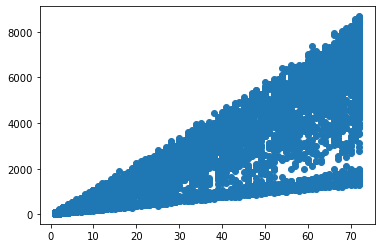

In [55]:
plt.scatter(x,y)

In [56]:
r, p = stats.pearsonr(x,y)
r, p

(0.8258804609332093, 0.0)

In [57]:
p<alpha

True

$H_0$: There is no linear correlation between the total charges and tenure

##### Conclusion: there is a positive correlation. Because p <α, we reject our $H_0$

#### 1c. What happens if you control for phone and internet service?

In [58]:
#exlude phone
phone = df[df.PhoneService == 'No']
phone.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


In [59]:
x=phone.tenure
monthly_charges = phone.MonthlyCharges
total_charges = phone.TotalCharges.astype(float) #must change data type

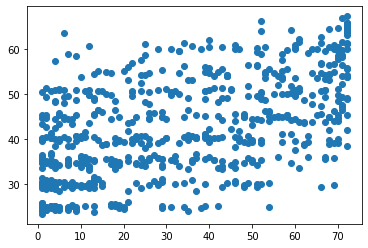

In [60]:
#plot correlation between monthly charges and phone service
plt.scatter(x,monthly_charges)

In [61]:
r,p= stats.pearsonr(x, monthly_charges)
r,p

(0.5924298640568981, 1.1732739032893169e-65)

In [62]:
p<alpha

True

$H_0$: There is no linear correlation between the monthly charges and phone service
    
##### Conclusion: there is a low positive correlation. Because p <α, we reject our $H_0$ 

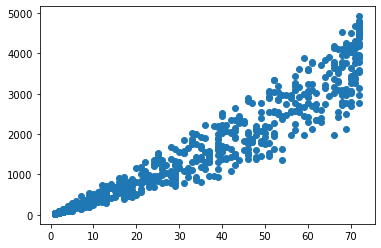

In [63]:
#plot correlation between total charges and phone service
plt.scatter(x,total_charges)

In [64]:
r,p= stats.pearsonr(x, total_charges)
r,p

(0.9534228506954507, 0.0)

In [65]:
p<alpha

True

$H_0$: There is no linear correlation between the total charges and phone service
    
##### Conclusion: there is a strong positive correlation. Because p <α, we reject our $H_0$ 

In [66]:
#create variable for internet
internet = df[df.InternetService == "No"]
internet

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [67]:
#rename x
x = internet.tenure

In [68]:
monthly_charges = internet.MonthlyCharges
total_charges = internet.TotalCharges.astype(float)

In [69]:
#monthly internet
r,p= stats.pearsonr(x, monthly_charges)
r,p

(0.34618773548574805, 4.896604599947503e-44)

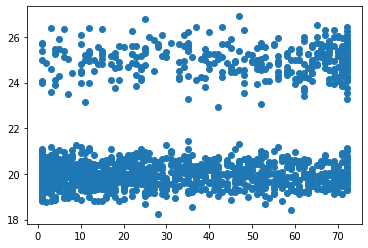

In [70]:
plt.scatter(x,monthly_charges)

In [71]:
p<alpha

True

$H_0$: There is no linear correlation between the monthly charges and internet service
    
##### Conclusion: there is no  correlation. Because p <α, we reject our $H_0$ 

#total internet
r,p= stats.pearsonr(x, total_charges)
r,p

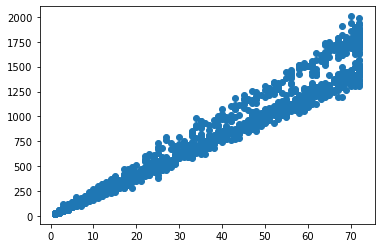

In [72]:
plt.scatter(x,total_charges)

In [73]:
p <alpha

True

$H_0$: There is no linear correlation between the total charges and internet service
    
##### Conclusion: there is a strong positive correlation. Because p <α, we reject our $H_0$ 

______________________________________

#### #2 Use the employees database.

### Step1: Set up the environment 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from env import host, user, password

## Step 2: Set up database

In [75]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [76]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

## Step 3: Set up queries and get connection

In [77]:
employees_df = pd.read_sql('SELECT * from employees', url)
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [78]:
salaries_df = pd.read_sql('SELECT * from salaries', url)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [79]:
titles_df = pd.read_sql('SELECT * from titles', url)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


## Step 4: Aggregate title by employee number

In [80]:
countref= titles_df.groupby('emp_no').count()[['title']].rename(columns={'title':'titlecount'})

In [81]:
## Step 5: Join to titles

In [82]:
merged =pd.merge(titles_df, countref, how='left', on='emp_no')

In [83]:
merged.head()

,emp_no,title,from_date,to_date,titlecount
0,10001,Senior Engineer,1986-06-26,9999-01-01,1
1,10002,Staff,1996-08-03,9999-01-01,1
2,10003,Senior Engineer,1995-12-03,9999-01-01,1
3,10004,Engineer,1986-12-01,1995-12-01,2
4,10004,Senior Engineer,1995-12-01,9999-01-01,2


In [84]:
merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now()) if str(x).startswith('9999') else pd.to_datetime(x)

In [85]:
merged['from_date'] = merged['from_date'].apply(lambda x: pd.datetime.now()) if str(x).startswith('9999') else pd.to_datetime(x)

In [86]:
#merged['tenure'] = (merged.to_date - merged.from_date).astype(int)

#### 2a. Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
merged = pd.merge(titles_df, salaries_df, how = 'left', on= 'to_date')

In [ ]:
merged.head()

#### 2b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

_____________________________________

#### #3. Use the sleepstudy data.

In [ ]:
sleepstudy = data('sleepstudy')

In [ ]:
sleepstudy.head()

In [ ]:
sleepstudy.info()

#### 3a. Is there a relationship between days and reaction time?

In [ ]:
#give values to x and y
x= sleepstudy.Days
y= sleepstudy.Reaction
alpha= 0.5

In [ ]:
plt.scatter(x,y)

In [ ]:
r, p = stats.pearsonr(x,y)
r, p

In [ ]:
p<alpha

$H_0$: There is no linear correlation between days and reaction time
    
##### Conclusion: there is a positive correlation. Because p <α, we reject our $H_0$ 